In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn.metrics import mean_squared_error as MSE
plt.rcParams.update({'font.size': 8})
import networkx as nx

%matplotlib inline

In [63]:
data=pd.read_csv("data.csv")
data.head()


#d=data[data['weight_class']=="Women's Strawweight"]
d=data

In [65]:
d.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [66]:
FG = nx.from_pandas_edgelist(d, source='R_fighter', target='B_fighter', edge_attr=True,)

In [67]:
FG.nodes()

NodeView(('Henry Cejudo', 'Marlon Moraes', 'Valentina Shevchenko', 'Jessica Eye', 'Tony Ferguson', 'Donald Cerrone', 'Jimmie Rivera', 'Petr Yan', 'Tai Tuivasa', 'Blagoy Ivanov', 'Tatiana Suarez', 'Nina Ansaroff', 'Aljamain Sterling', 'Pedro Munhoz', 'Karolina Kowalkiewicz', 'Alexa Grasso', 'Ricardo Lamas', 'Calvin Kattar', 'Yan Xiaonan', 'Angela Hill', 'Bevon Lewis', 'Darren Stewart', 'Eddie Wineland', 'Grigorii Popov', 'Katlyn Chookagian', 'Joanne Calderwood', 'Alexander Gustafsson', 'Anthony Smith', 'Jimi Manuwa', 'Aleksandar Rakic', 'Makwan Amirkhani', 'Chris Fishgold', 'Damir Hadzovic', 'Christos Giagos', 'Daniel Teymur', 'Sung Bin Jo', 'Rostem Akman', 'Sergey Khandozhko', 'Tonya Evinger', 'Lina Lansberg', 'Stevie Ray', 'Leonardo Santos', 'Nick Hein', 'Frank Camacho', 'Bea Malecki', 'Duda Santana', 'Darko Stosic', 'Devin Clark', 'Joel Alvarez', 'Danilo Belluardo', 'Rafael Dos Anjos', 'Kevin Lee', 'Antonio Carlos Junior', 'Ian Heinisch', 'Megan Anderson', 'Felicia Spencer', 'Vicente

In [68]:
FG.edges()

EdgeView([('Henry Cejudo', 'Marlon Moraes'), ('Henry Cejudo', 'TJ Dillashaw'), ('Henry Cejudo', 'Demetrious Johnson'), ('Henry Cejudo', 'Sergio Pettis'), ('Henry Cejudo', 'Wilson Reis'), ('Henry Cejudo', 'Joseph Benavidez'), ('Henry Cejudo', 'Jussier Formiga'), ('Henry Cejudo', 'Chico Camus'), ('Henry Cejudo', 'Chris Cariaso'), ('Henry Cejudo', 'Dustin Kimura'), ('Marlon Moraes', 'Raphael Assuncao'), ('Marlon Moraes', 'Jimmie Rivera'), ('Marlon Moraes', 'Aljamain Sterling'), ('Marlon Moraes', 'John Dodson'), ('Valentina Shevchenko', 'Jessica Eye'), ('Valentina Shevchenko', 'Joanna Jedrzejczyk'), ('Valentina Shevchenko', 'Priscila Cachoeira'), ('Valentina Shevchenko', 'Amanda Nunes'), ('Valentina Shevchenko', 'Julianna Pena'), ('Valentina Shevchenko', 'Holly Holm'), ('Valentina Shevchenko', 'Sarah Kaufman'), ('Jessica Eye', 'Katlyn Chookagian'), ('Jessica Eye', 'Jessica-Rose Clark'), ('Jessica Eye', 'Kalindra Faria'), ('Jessica Eye', 'Bethe Correia'), ('Jessica Eye', 'Sara McMann'), ('J

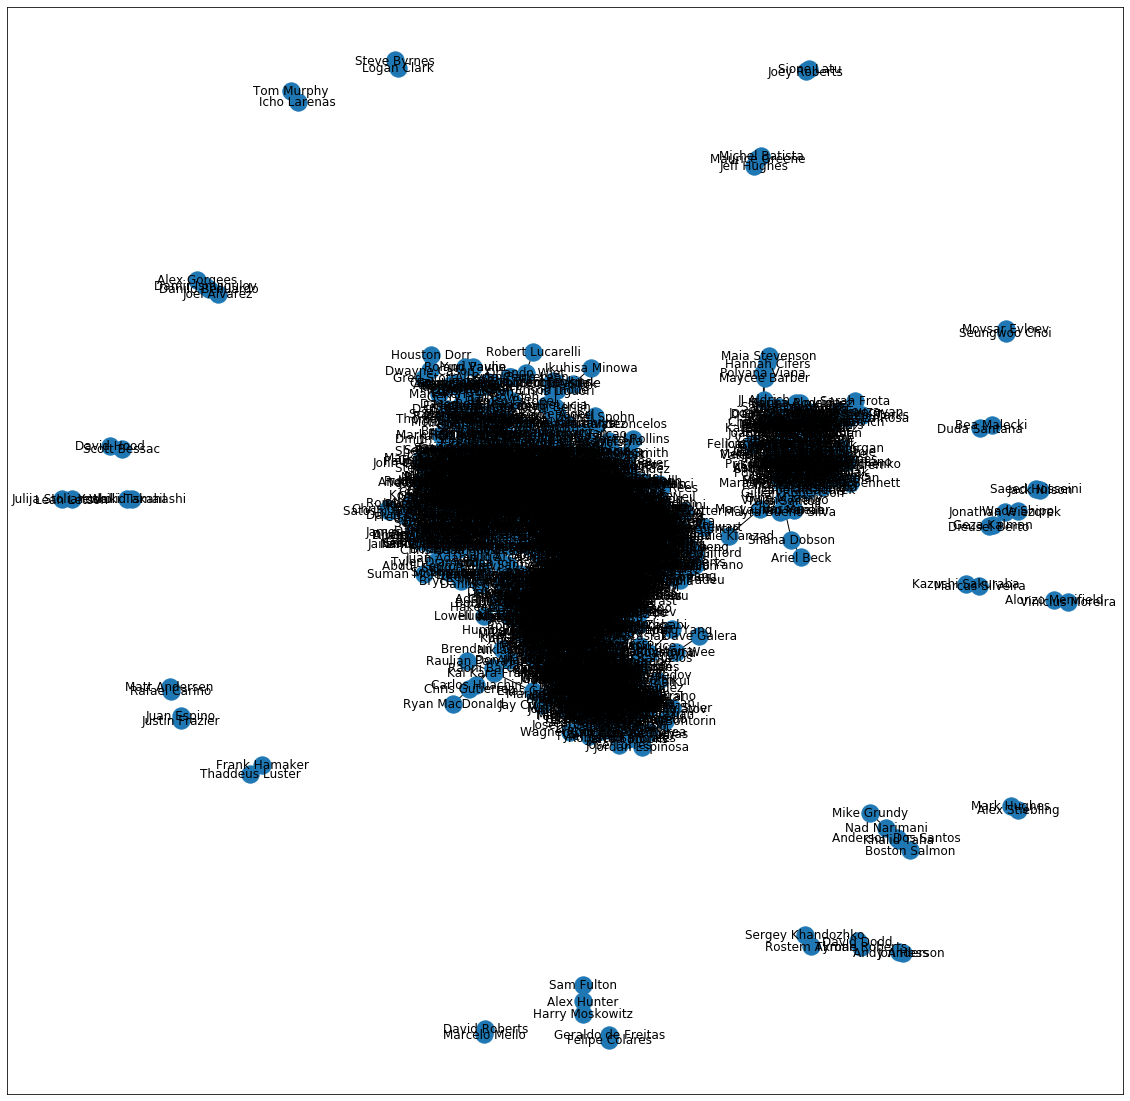

In [70]:
# your code is here (Quick view of the Graph.) 
g = nx.Graph() 

g.add_nodes_from(FG.nodes)
g.add_edges_from(FG.edges)

#remove = [node for node,degree in dict(g.degree()).items() if degree < 6]

#g.remove_nodes_from(remove)
#nx.draw(g)

pos = nx.spring_layout(FG)
#nx.draw_networkx_nodes(FG, pos, node_size = 10)
#nx.draw_networkx_labels(FG, pos)
#nx.draw_networkx_edges(FG, pos)

#plt.figure(figsize=(5000,5000))
#plt.show()
#plt.rcParams["figure.figsize"] = (20,20)
#nx.draw(g)

nx.draw_networkx(FG, pos=pos)


In [71]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates

# airports = JFK, EWR, LGA
# Calculate average edge density of the Graph

# your code is here
from statistics import mean
s=pd.DataFrame.from_dict(nx.algorithms.degree_centrality(FG), orient='index')
mean(s[0])

0.002737012694697038

In [72]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{10: 9.751851851851852,
 5: 8.711926605504587,
 7: 8.965367965367966,
 11: 10.62190082644628,
 16: 13.540178571428571,
 31: 15.709677419354838,
 9: 9.932203389830509,
 3: 7.977207977207978,
 13: 11.665865384615385,
 4: 8.115079365079366,
 2: 8.45774647887324,
 1: 7.087628865979381,
 15: 12.184848484848485,
 12: 10.998015873015873,
 6: 8.676282051282051,
 8: 9.196428571428571,
 26: 14.0,
 14: 11.438775510204081,
 21: 13.027777777777779,
 22: 12.627272727272727,
 25: 13.373333333333333,
 20: 11.895454545454545,
 27: 11.62962962962963,
 17: 12.294117647058824,
 18: 10.965277777777779,
 30: 14.583333333333334,
 24: 12.322916666666666,
 29: 13.844827586206897,
 28: 13.071428571428571,
 23: 13.76086956521739,
 19: 11.480263157894736}

In [73]:
nx.average_shortest_path_length(FG) # Average shortest path length for ALL paths in the Graph

NetworkXError: Graph is not connected.

In [75]:
stats=nx.degree_centrality(FG)

from collections import Counter 
k=Counter(stats)
high = k.most_common(3) #most popular fighters

print(high)

[('Donald Cerrone', 0.01619644723092999), ('Jim Miller', 0.015673981191222573), ('Jeremy Stephens', 0.015673981191222573)]


In [76]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(FG)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

3973


In [81]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(FG)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())
print(max_dc)

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


0.01619644723092999
['Donald Cerrone']


In [78]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in FG.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(FG.neighbors(n), 2):
    
        # Check whether n1 and n2 do not have an edge
        if not FG.has_edge(n1, n2):
        
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Derrick Lewis', 'Fabricio Werdum'), ('Tyron Woodley', 'Jake Ellenberger')]


In [79]:
# Let us try to find the dijkstra path for the recommended fights
shortpath = nx.dijkstra_path(FG, source='Derrick Lewis', target='Fabricio Werdum')
shortpath

['Derrick Lewis', 'Junior Dos Santos', 'Fabricio Werdum']

In [80]:
# Let us try to find the dijkstra path for the recommended fights
shortpath = nx.dijkstra_path(FG, source='Tyron Woodley', target='Jake Ellenberger')
shortpath

['Tyron Woodley', 'Stephen Thompson', 'Jake Ellenberger']